In [262]:
import pandas as pd
import numpy as np
# import geopy
# from geopy.distance import geodesic as GD
# from geopy import Point
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
bikes = pd.read_csv(r'../data/df_1_year.csv')

In [3]:
bikes[bikes['start_station_name'].isna()].head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00


In [4]:
bikes['rideable_type'].value_counts()

classic_bike     1663393
electric_bike    1483437
docked_bike        89057
Name: rideable_type, dtype: int64

In [5]:
bikes.describe()

,Unnamed: 0,start_lat,start_lng,end_lat,end_lng,Year,Month,ride_length
count,3.235887e+06,3.235887e+06,3.235887e+06,3.235669e+06,3.235669e+06,3.235887e+06,3.235887e+06,3.235887e+06
mean,3.463536e+05,4.190135e+01,-8.764817e+01,4.190154e+01,-8.764835e+01,2.021525e+03,7.268139e+00,1.260825e+01
std,2.264062e+05,4.682097e-02,3.033355e-02,4.695840e-02,3.047241e-02,4.993954e-01,2.465169e+00,8.815981e+00
min,0.000000e+00,4.164000e+01,-8.784000e+01,4.160000e+01,-8.787000e+01,2.021000e+03,1.000000e+00,1.666667e-02
25%,1.491620e+05,4.188169e+01,-8.766358e+01,4.188169e+01,-8.766371e+01,2.021000e+03,6.000000e+00,5.916667e+00
50%,3.189830e+05,4.190000e+01,-8.764414e+01,4.190022e+01,-8.764414e+01,2.022000e+03,7.000000e+00,1.023333e+01
75%,5.355470e+05,4.193000e+01,-8.762979e+01,4.193000e+01,-8.762979e+01,2.022000e+03,9.000000e+00,1.726667e+01
max,8.234870e+05,4.207000e+01,-8.752000e+01,4.211000e+01,-8.750000e+01,2.022000e+03,1.200000e+01,4.028333e+01


In [6]:
bikes.shape

(3235887, 18)

In [7]:
# import sweetviz as sv
# #You could specify which variable in your dataset is the target for your model creation. We can specify it using the target_feat parameter.
# my_report = sv.analyze(bikes)
# my_report.show_html()

In [15]:
# bikes['start_point'] = bikes.apply(lambda row: Point(latitude=row['start_lat'], longitude=row['start_lng']), axis=1)

In [18]:
bikes = bikes[bikes['end_lat'].notna()]

In [19]:
# bikes['end_point'] = bikes.apply(lambda row: Point(latitude=row['end_lat'], longitude=row['end_lng']), axis=1)

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_76801/3036927553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes['end_point'] = bikes.apply(lambda row: Point(latitude=row['end_lat'], longitude=row['end_lng']), axis=1)


In [20]:
# bikes.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,start_point,end_point
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 40m 48s W"
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 37m 48s W"
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,"41 57m 1.02318e-11s N, 87 39m 2.04636e-11s W","41 58m 12s N, 87 39m 36s W"
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,"41 48m 36s N, 87 36m 36s W","41 47m 60s N, 87 35m 60s W"
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,"41 46m 12s N, 87 37m 12s W","41 48m 36s N, 87 36m 36s W"


In [13]:
# bikes['dist'] = GD((bikes['start_lng'], bikes['start_lat']), (bikes['end_lng'], bikes['end_lat'])).km

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [29]:
def manhattan(s_long, s_lat, e_long, e_lat):
    dif_long = abs(s_long - e_long)
    dif_lat = abs(s_lat - e_lat)

    dif_long_km = dif_long * abs(math.cos(s_lat)) * 111.320
    dif_lat_km = dif_lat * 110.574

    return dif_long_km + dif_lat_km

In [30]:
bikes['manh_dist'] = bikes.apply(lambda row: manhattan(row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat']), axis=1)

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_76801/2539045171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes['manh_dist'] = bikes.apply(lambda row: manhattan(row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat']), axis=1)


In [31]:
bikes.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,start_point,end_point,manh_dist
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,...,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 40m 48s W",0.000000
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,...,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 37m 48s W",3.330686
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,...,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,"41 57m 1.02318e-11s N, 87 39m 2.04636e-11s W","41 58m 12s N, 87 39m 36s W",2.707180
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,...,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,"41 48m 36s N, 87 36m 36s W","41 47m 60s N, 87 35m 60s W",1.735678
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,...,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,"41 46m 12s N, 87 37m 12s W","41 48m 36s N, 87 36m 36s W",5.089097


In [32]:
def haversine(s_long, s_lat, e_long, e_lat):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(math.radians, [s_long, s_lat, e_long, e_lat])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [33]:
bikes['haver_dist'] = bikes.apply(lambda row: haversine(row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat']), axis=1)

/var/folders/sk/rfg_lvqj5r5c204vs5zftlgw0000gn/T/ipykernel_76801/2817421626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes['haver_dist'] = bikes.apply(lambda row: haversine(row['start_lng'], row['start_lat'], row['end_lng'], row['end_lat']), axis=1)


In [34]:
bikes.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,end_lng,member_casual,Year,Month,ride_length,Year-Month,start_point,end_point,manh_dist,haver_dist
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,...,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 40m 48s W",0.000000,0.000000
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,...,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,"41 46m 12s N, 87 40m 48s W","41 46m 12s N, 87 37m 48s W",3.330686,4.146597
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,...,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,"41 57m 1.02318e-11s N, 87 39m 2.04636e-11s W","41 58m 12s N, 87 39m 36s W",2.707180,2.372640
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,...,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,"41 48m 36s N, 87 36m 36s W","41 47m 60s N, 87 35m 60s W",1.735678,1.386885
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,...,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,"41 46m 12s N, 87 37m 12s W","41 48m 36s N, 87 36m 36s W",5.089097,4.524405


In [ ]:
sns.histplot(bikes['ride_length'])
plt.title('Time Spent Riding', fontsize=18)
plt.xlabel('Ride Time (Minutes)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [ ]:
plt.hist(bikes["ride_length"])
plt.show()

In [ ]:
explode = (0.1, 0.1, 0.1)

plt.pie(bikes.rideable_type.value_counts(), labels=bikes.rideable_type.value_counts().index, explode = explode, shadow=True)

plt.title('Types of bikes',fontweight='bold')

plt.show()

In [ ]:
sns.lineplot( x = "ride_length",
             y = "manh_dist",
             data = bikes),
plt.title('Manhattan Distance by Time Riding', fontsize=18);

In [ ]:
sns.set(style='whitegrid')
plt.title('Riding Distance per Month/Year', fontsize=18)
sns.boxplot(x="haver_dist",
                y="Year-Month",
                data=bikes);

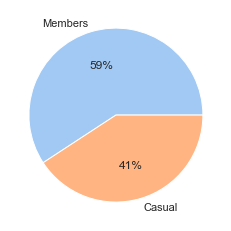

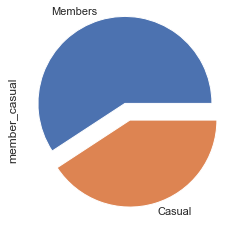

In [51]:
mylabels = ["Members", "Casual"]
colors = sns.color_palette('pastel')
#create pie chart
sns.set_theme(style='white')
plt.pie(bikes['member_casual'].value_counts(), labels = mylabels, colors = colors, autopct='%.0f%%')
plt.show()

bikes['member_casual'].value_counts().plot.pie(labels=mylabels, explode=[0.2,0]);

In [99]:
monthly_bikes = bikes['Month'].value_counts()
angles=np.linspace(0,2*np.pi,len(monthly_bikes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
print(angles)
monthly_bikes = pd.DataFrame(monthly_bikes.sort_index())
monthly_bikes.reset_index(inplace=True)
monthly_bikes = monthly_bikes.append({'Month':48289, 'index': 1}, ignore_index=True)

[0.         0.52359878 1.04719755 1.57079633 2.0943951  2.61799388
 3.14159265 3.66519143 4.1887902  4.71238898 5.23598776 5.75958653
 0.        ]


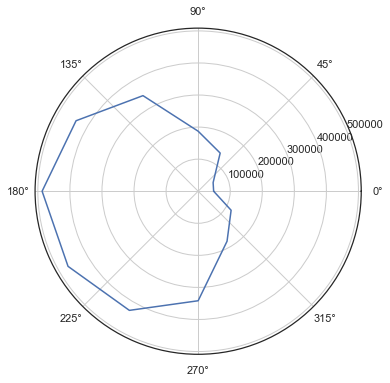

In [80]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
ax.plot(angles,monthly_bikes['Month'])
plt.show()

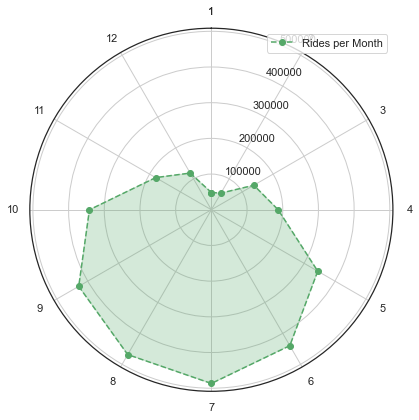

In [82]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
#basic plot
ax.plot(angles,monthly_bikes['Month'], 'o--', color='g', label='Rides per Month')
#fill plot
ax.fill(angles, monthly_bikes['Month'], alpha=0.25, color='g')
#Add labels
ax.set_thetagrids(angles * 180/np.pi, monthly_bikes['index'])
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [109]:
monthly_bikes.columns = ["Month", 'Value']
monthly_bikes

,Month,Value
0,1,48289
1,2,53909
2,3,137404
3,4,187180
4,5,344213
5,6,439700
6,7,486722
7,8,468613
8,9,429108
9,10,341627


In [123]:
fig = px.line_polar(monthly_bikes, r='Value', theta=[30*i for i in range(13)], line_close=False)
fig.update_traces(fill='toself')
fig.show()

In [120]:
import plotly.graph_objects as go

fig = go.Figure(go.Barpolar(
    r=monthly_bikes['Value'],
    theta=[30*i + 90 for i in range(12)],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8
))

fig.update_layout(
    template=None,
    polar = dict(
        radialaxis = dict(range=[0, 500000], showticklabels=False, ticks=''),
        angularaxis = dict(showticklabels=False, ticks='')
    )
)

fig.show()


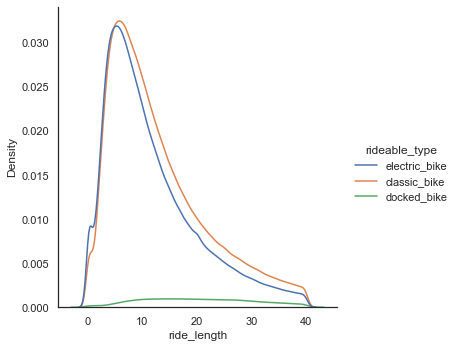

In [144]:
sns.displot(bikes, x="ride_length", hue="rideable_type", kind='kde');

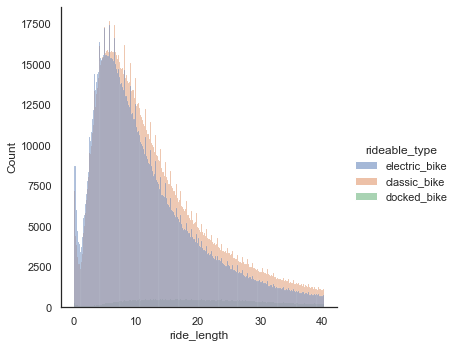

In [156]:
sns.displot(bikes, x="ride_length", hue="rideable_type");

In [178]:
street_file = gpd.read_file(r'../data/StreetCenterLines/geo_export_191489e2-fd45-4e73-9833-f7289dbea98d.shp')

In [288]:
top100_start_station = bikes['start_station_name'].value_counts().sort_values(ascending=False).reset_index()[:100]
top100_start_station.columns = ["start_station_name", "count"]
top100_start_station

,start_station_name,count
0,Streeter Dr & Grand Ave,37904
1,Wells St & Concord Ln,24392
2,DuSable Lake Shore Dr & North Blvd,23902
3,Clark St & Elm St,21534
4,Wells St & Elm St,20792
...,...,...
95,Clark St & Grace St,9382
96,Michigan Ave & 8th St,9377
97,Clark St & Randolph St,9304
98,Wood St & Milwaukee Ave,9300


In [289]:
top100_start_station = top100_start_station.set_index('start_station_name').join(bikes.set_index('start_station_name'), how='inner', on='start_station_name')
top100_start_station = top100_start_station.groupby(by='start_station_name').agg('mean')
top100_start_station.reset_index(inplace=True)
top100_start_station

,start_station_name,count,Unnamed: 0,start_lat,start_lng,end_lat,end_lng,Year,Month,ride_length,manh_dist,haver_dist
0,Ashland Ave & Division St,14906.0,317142.194620,41.903404,-87.667805,41.902895,-87.660990,2021.507849,7.291829,12.595031,2.414183,2.354640
1,Bissell St & Armitage Ave,9386.0,343406.053271,41.918247,-87.652193,41.918178,-87.649714,2021.403260,7.514809,11.357829,2.022184,1.925412
2,Broadway & Barry Ave,17454.0,350426.626504,41.937612,-87.644099,41.932698,-87.647944,2021.499943,7.335682,12.556170,2.328616,2.152774
3,Broadway & Belmont Ave,9831.0,355955.383074,41.940104,-87.645464,41.934190,-87.650637,2021.525074,7.271997,12.958355,2.356049,2.233228
4,Broadway & Cornelia Ave,12244.0,338756.108216,41.945522,-87.646439,41.938615,-87.650520,2021.539121,7.222885,12.672685,2.430932,2.257235
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wells St & Hubbard St,14280.0,306347.003361,41.889940,-87.634273,41.894251,-87.639245,2021.536345,7.158543,10.712227,1.870043,1.757156
96,Wells St & Huron St,16946.0,351642.323203,41.894754,-87.634393,41.898290,-87.638111,2021.460463,7.436445,9.869688,1.809003,1.688621
97,Wilton Ave & Belmont Ave,16718.0,368135.022909,41.940155,-87.653021,41.935091,-87.654342,2021.499402,7.331738,11.688270,2.175728,2.069529
98,Wilton Ave & Diversey Pkwy,11408.0,345113.282521,41.932412,-87.652706,41.927425,-87.650817,2021.511133,7.314604,10.447985,1.947837,1.846477


In [290]:
top100_end_station = bikes['end_station_name'].value_counts().sort_values(ascending=False).reset_index()[:100]
top100_end_station.columns = ["end_station_name", "count"]
top100_end_station

,end_station_name,count
0,Streeter Dr & Grand Ave,35661
1,DuSable Lake Shore Dr & North Blvd,26595
2,Wells St & Concord Ln,25376
3,Clark St & Elm St,21726
4,Michigan Ave & Oak St,20557
...,...,...
95,Broadway & Belmont Ave,9294
96,Sedgwick St & Webster Ave,9248
97,Clark St & Randolph St,9196
98,Wood St & Milwaukee Ave,9030


In [291]:
top100_end_station = top100_end_station.set_index('end_station_name').join(bikes.set_index('end_station_name'), how='inner', on='end_station_name')
top100_end_station = top100_end_station.groupby(by='end_station_name').agg('mean')
top100_end_station.reset_index(inplace=True)
top100_end_station

,end_station_name,count,Unnamed: 0,start_lat,start_lng,end_lat,end_lng,Year,Month,ride_length,manh_dist,haver_dist
0,Ashland Ave & Division St,14472.0,337675.402709,41.903111,-87.660778,41.903443,-87.667763,2021.510987,7.227128,12.377583,2.395780,2.337115
1,Bissell St & Armitage Ave,9801.0,328923.955617,41.917032,-87.648160,41.918253,-87.652192,2021.397408,7.493929,11.363856,2.022495,1.901746
2,Broadway & Barry Ave,17625.0,322594.617872,41.931387,-87.647643,41.937586,-87.644100,2021.487035,7.360511,12.794178,2.447436,2.246810
3,Broadway & Belmont Ave,9294.0,286008.987842,41.934307,-87.650327,41.940089,-87.645453,2021.525178,7.222294,13.431857,2.473020,2.320193
4,Broadway & Cornelia Ave,12446.0,382083.885023,41.936993,-87.650266,41.945532,-87.646439,2021.534630,7.209706,13.378577,2.623611,2.425906
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wells St & Hubbard St,14424.0,371441.495147,41.897242,-87.639599,41.889926,-87.634285,2021.523364,7.193982,10.718949,1.994836,1.879448
96,Wells St & Huron St,16021.0,317935.806566,41.900418,-87.638824,41.894735,-87.634368,2021.481743,7.346171,9.899346,1.876719,1.758098
97,Wilton Ave & Belmont Ave,16718.0,412014.817861,41.934756,-87.653774,41.940171,-87.653040,2021.542230,7.307692,11.773998,2.213868,2.082682
98,Wilton Ave & Diversey Pkwy,11364.0,325609.592485,41.927230,-87.650279,41.932415,-87.652710,2021.508096,7.324886,10.250311,1.985703,1.861088


''

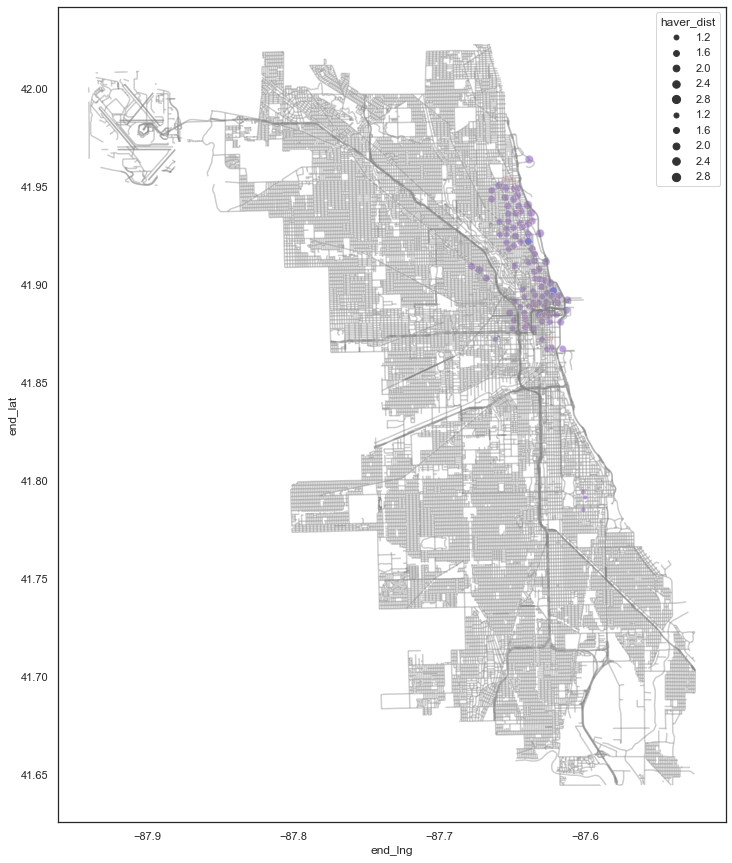

In [293]:
fig, ax = plt.subplots(figsize=(15,15))
street_file.plot(ax=ax, color='grey', alpha=0.4)
sns.scatterplot(data=top100_end_station, x="end_lng", y="end_lat", color='blue', alpha=0.5, size='haver_dist')
sns.scatterplot(data=top100_start_station, x="start_lng", y="start_lat", color='pink',alpha=0.5, size='haver_dist')
;

In [294]:
map_osm = folium.Map(location=[41.900968, -87.623787], zoom_start=11)
# Create the Heat Map
#Make the list of Lat an Long
lat = top100_end_station.end_lat.tolist()
lng = top100_end_station.end_lng.tolist()
HeatMap(list(zip(lat, lng))).add_to(map_osm)
# Add the Circles with the corresponding races based on the color
top100_end_station.apply(lambda x:folium.Circle(location=[x['end_lat'], x['end_lng']], radius=50, fill=True).add_to(map_osm), axis=1)

lat = top100_start_station.end_lat.tolist()
lng = top100_start_station.end_lng.tolist()
HeatMap(list(zip(lat, lng))).add_to(map_osm)

top100_start_station.apply(lambda x:folium.Circle(location=[x['end_lat'], x['end_lng']], radius=50, fill=True).add_to(map_osm), axis=1)
map_osm
